In [6]:
import torch.nn as nn
class Net(nn.Module):
    def __init__(self, D_in, H1, H2, D_out):
 
        super(Net, self).__init__()
        self.linear1 = nn.Linear(D_in, H1) 
        self.linear2 = nn.Linear(H1, H2)
        self.linear3 = nn.Linear(H2, D_out)
  
    def forward(self, x):
    
        x = torch.sigmoid(self.linear1(x))
        x = torch.sigmoid(self.linear2(x))
        x = self.linear3(x)
        return x


In [7]:
import torch 
import xlrd
from sklearn.preprocessing import StandardScaler
import numpy as np

N, D_in, H1, H2, D_out = 50, 5, 20, 12, 3
model = Net(D_in, H1, H2, D_out)

model.load_state_dict(torch.load("C:/Users/Gabriel/Documents/Python/ANN2.pt"))
model.eval()
book = xlrd.open_workbook('prepareddata.xlsx')
sheet = book.sheet_by_name('Sheet1')
data4 = [[sheet.cell_value(r, c)
         for c in range(0,5)] for r in range(0,7272)]
data5 = [[sheet.cell_value(r, c)
         for c in range(5,8)] for r in range(0,7272)]
scaler = StandardScaler()
scaler2 = StandardScaler()
scaler.fit(data4)


StandardScaler(copy=True, with_mean=True, with_std=True)

In [8]:


book = xlrd.open_workbook('Experimental Data edited.xlsx')
sheet = book.sheet_by_name('Sheet2')
data = [[sheet.cell_value(r, c)
         for c in range(1,6)] for r in range(98,110)]
data2 = [[sheet.cell_value(r, c)
         for c in range(1,4)] for r in range(98,110)]
data3 = [[sheet.cell_value(r, c)
         for c in range(1,4)] for r in range(99,111)]
scaler = StandardScaler(with_mean=True, with_std=True)


scaler.fit(data4)
scaler2.fit(data5)
standardised_data = scaler.transform(data)





x = torch.tensor(standardised_data)
z = torch.tensor(data2)
v = torch.tensor(data3)
with torch.no_grad():
     dx_dt_pred = model(x.float())
predictions= np.array(dx_dt_pred)
descaled_predictions = scaler2.inverse_transform(predictions)
usable_predictions = torch.tensor(descaled_predictions)
x_pred = (usable_predictions*12) + z

print(x)
print(dx_dt_pred)
print(usable_predictions)
print(x_pred)
print(v)



tensor([[-1.5113e+00,  6.0484e-02, -1.5362e+00,  1.6432e+00,  1.0000e+00],
        [-1.2172e+00,  1.5462e-01, -1.0751e+00,  1.6432e+00,  1.0000e+00],
        [-8.3113e-01,  3.2400e-02, -6.9708e-01,  1.6432e+00,  1.0000e+00],
        [-4.4968e-01, -2.8818e-03, -3.1908e-01,  1.6432e+00,  1.0000e+00],
        [-1.0850e-01,  1.2074e-01, -1.5696e-03,  1.6432e+00,  1.0000e+00],
        [ 2.1689e-01,  2.0405e-02,  3.1595e-01,  1.6432e+00,  1.0000e+00],
        [ 4.8030e-01,  5.2028e-01,  5.6542e-01,  1.6432e+00,  1.0000e+00],
        [ 7.7325e-01,  1.4334e+00,  8.1490e-01,  1.6432e+00,  1.0000e+00],
        [ 9.8266e-01,  1.9845e+00,  1.0795e+00,  1.6432e+00,  1.0000e+00],
        [ 1.2117e+00,  2.7116e+00,  1.2080e+00,  1.6432e+00,  1.0000e+00],
        [ 1.4019e+00,  3.1982e+00,  1.4348e+00,  1.6432e+00,  1.0000e+00],
        [ 1.5643e+00,  3.6434e+00,  1.6011e+00,  1.6432e+00,  1.0000e+00]],
       dtype=torch.float64)
tensor([[ 1.7464, -0.6631,  1.8782],
        [ 1.8279, -0.6468,  1.9341

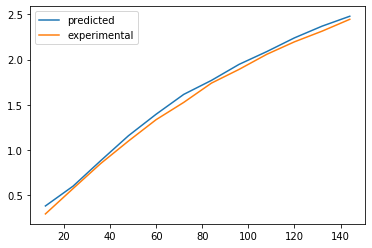

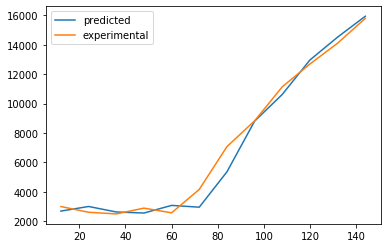

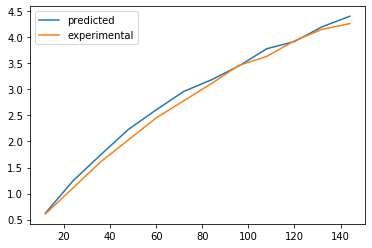

In [9]:
import numpy as np
a = np.linspace(12,144,12)

import matplotlib.pyplot as plt 
y1 = x_pred[:, 0:1] 
x1 = a
plt.plot(x1, y1, label = "predicted") 

y2 = v[:, 0:1] 
x2 = a
plt.plot(x2, y2, label = "experimental") 

plt.legend()
plt.show() 

y1 = x_pred[:, 1:2] 
x1 = a
plt.plot(x1, y1, label = "predicted") 

y2 = v[:, 1:2] 
x2 = a
plt.plot(x2, y2, label = "experimental") 

plt.legend()
plt.show() 

y1 = x_pred[:, 2:3] 
x1 = a
plt.plot(x1, y1, label = "predicted") 

y2 = v[:, 2:3] 
x2 = a
plt.plot(x2, y2, label = "experimental") 

plt.legend()
plt.show() 

In [7]:
import pandas as pd
b=np.array(v)
c=np.array(x_pred)
book = xlrd.open_workbook('tested data.xlsx')
sheet = book.sheet_by_name('Sheet1')
writer = pd.ExcelWriter('tested data.xlsx', engine='xlsxwriter')
df1 = pd.DataFrame(b)
df1.to_excel(writer, header=True, index=True)
df2 = pd.DataFrame(c)
df2.to_excel(writer, startrow=13, header=True, index=True)
writer.save()